In [54]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

from tbats import BATS, TBATS

import holidays

In [318]:
# load data
df_train=pd.read_csv(f"/Users/luca/Desktop/GEFCom2014 Data/Load/L-train.csv")

In [336]:
y_train=df_train["w_avg"]
X_train=df_train[["DAY",  "MONTH",  "HOUR",  "DAY_OF_WEEK",  "IS_HOLIDAY"]]

df_test=pd.read_csv(f"/Users/luca/Desktop/GEFCom2014 Data/Load/Task 6/L6-test_clean.csv")

X_test=df_test[["DAY",  "MONTH",  "HOUR",  "DAY_OF_WEEK",  "IS_HOLIDAY"]]
y_test=df_test["w_avg"]

In [337]:
df_avg=pd.read_csv(f"/Users/luca/Desktop/GEFCom2014 Data/Load/Task 6/L6-avg_test_clean.csv")
y_avg=df_avg["w_avg"]

In [338]:
df_train_old=pd.read_csv(f"/Users/luca/Desktop/GEFCom2014 Data/Load/Task 1/L1-train.csv")

In [339]:
df_train_old["TIMESTAMP"]
dates = pd.date_range(start='2001-01-01 01:00:00', periods=len(df_train_old), freq='H')
df_train_old['DAY'] = dates.day
df_train_old['MONTH'] = dates.month
df_train_old['HOUR'] = dates.hour
df_train_old['YEAR'] = dates.year
df_train_old.drop(columns="TIMESTAMP", inplace=True)    

In [340]:

stat=df_train_old[df_train_old["MONTH"]==1]
stat["w1"].values

array([27, 25, 27, ..., 28, 28, 26])

In [352]:
y_wavg=pd.read_csv("/Users/luca/Desktop/GEFCom2014 Data/Load/Task 6/L6-test_clean.csv")["w_avg"]

In [354]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(y_wavg, trend='c', order=(1,1,1))
res = mod.fit(disp=False)

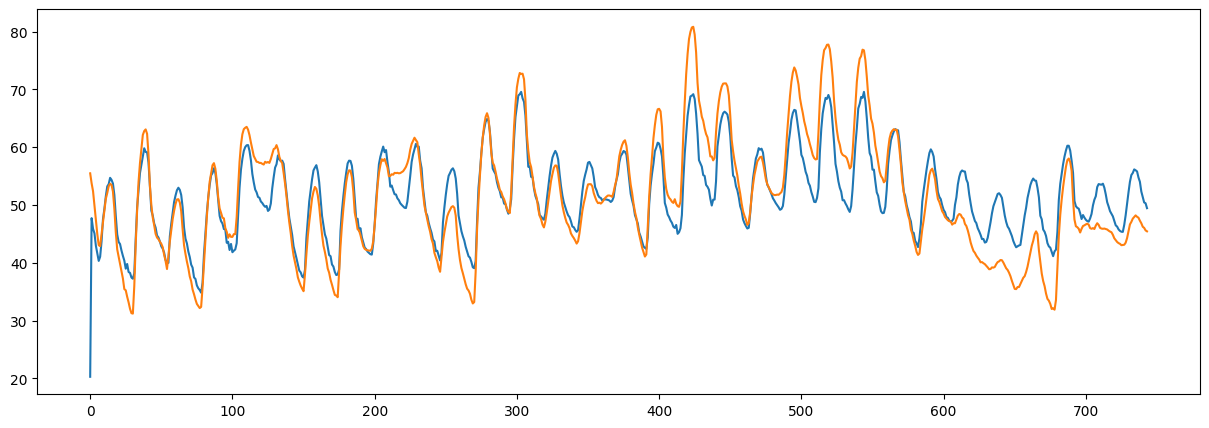

In [355]:
plt.figure(figsize=(15,5))
plt.plot(res.predict(0)/2+y_avg/2)
plt.plot(y_test)

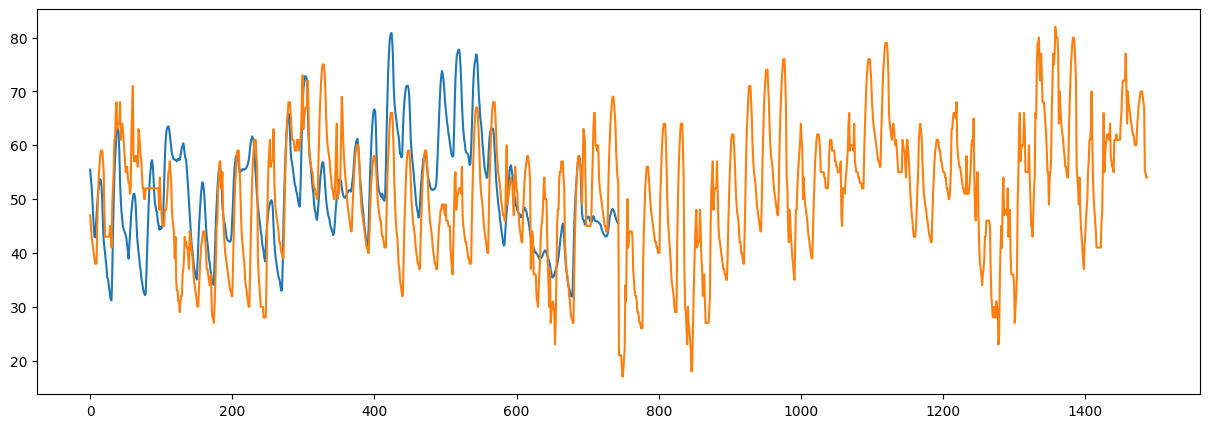

In [201]:
plt.figure(figsize=(15,5))
plt.plot(y_test)
plt.plot(stat["w1"][0:744*2].values)

In [178]:
# 4minuti 3.5s sy ultimi 744 dati
# 6m10.0s for month 2 on 4056
# 12m4.6 for month 4 on 4320
tbats=TBATS(seasonal_periods=[24,168]).fit(y_train[-744:])

In [179]:
# predict
y_hat = tbats.forecast(steps=len(y_test))

In [47]:
# plot result
plt.figure(figsize=(15,5))
plt.plot(y_hat, label="prediction")
plt.plot(y_test, label="true")

plt.xticks(np.arange(0,len(y_test)+1,25), rotation=45)

plt.xlabel("Days")
plt.ylabel("Temperatures Mwh")
plt.title("Tbats")
plt.legend()
plt.show()


NameError: name 'y_hat' is not defined

<Figure size 1500x500 with 0 Axes>

In [356]:
# save tbats
df_test["w_avg"]=res.predict(0)/2+y_avg/2
df_test.to_csv(f"/Users/luca/Desktop/GEFCom2014 Data/Load/Task 6/L6-avg_test_clean_tbats.csv")

In [358]:
import pandas as pd
import pickle

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_pinball_loss
from sklearn.preprocessing import StandardScaler
import sys

from tqdm import tqdm


def test(ith):
    df=pd.read_csv(f"/Users/luca/Desktop/GEFCom2014 Data/Load/Task {ith}/L{ith}-avg_test_clean_tbats.csv")

    X_test=df[["DAY",  "MONTH",  "HOUR",  "DAY_OF_WEEK",  "IS_HOLIDAY",  "w_avg"]]
    y_test=df["LOAD"]

    quantiles = [i/100 for i in range(1,100)]

    # we need to scale X_test
    df_train=pd.read_csv("/Users/luca/Desktop/GEFCom2014 Data/Load/L2009-train.csv")
    X_train=df_train[["DAY",  "MONTH",  "HOUR",  "DAY_OF_WEEK",  "IS_HOLIDAY",  "w_avg"]]
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    pinball_tot=0

    for i,q in enumerate(quantiles):
        krn_q=pickle.load(open(f"/Users/luca/Desktop/ThesisKernelMethods/dataset_applications/models/krn_qr_{i}.pkl", 'rb'))
        pinball_q=mean_pinball_loss(y_test,krn_q.predict(X_test_scaled), alpha=q)
        print(f"pinball loss quantile {q}: ", pinball_q)
        pinball_tot+=pinball_q
    
    print("total quantile: ", pinball_tot/len(quantiles))
    ans=pinball_tot/len(quantiles)
    return ans

test(6)

pinball loss quantile 0.01:  0.8863437844586843
pinball loss quantile 0.02:  1.3258423294451525
pinball loss quantile 0.03:  1.7031247279049841
pinball loss quantile 0.04:  2.033406394731993
pinball loss quantile 0.05:  2.3405188912317922
pinball loss quantile 0.06:  2.6852677025453184
pinball loss quantile 0.07:  2.950709592149495
pinball loss quantile 0.08:  3.1836686432623322
pinball loss quantile 0.09:  3.408929952357477
pinball loss quantile 0.1:  3.648131245294319
pinball loss quantile 0.11:  3.859726846534745
pinball loss quantile 0.12:  4.051000644313262
pinball loss quantile 0.13:  4.236368714561192
pinball loss quantile 0.14:  4.366483529320993
pinball loss quantile 0.15:  4.52220782230491
pinball loss quantile 0.16:  4.691560125678296
pinball loss quantile 0.17:  4.841281791141338
pinball loss quantile 0.18:  4.985575302203525
pinball loss quantile 0.19:  5.111265519305147
pinball loss quantile 0.2:  5.219749467894688
pinball loss quantile 0.21:  5.338055954980691
pinball lo

6.041229962024018